# 5. Graphs in Finance

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import copy

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


# Set path for generated figures
fig_path = './figures_5/'

## 5.1. S\&P 500 Stock Selection

In [ ]:
# Read data
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d")
snp = pd.read_csv("snp_allstocks_2015_2019.csv", index_col='Date', parse_dates=True, date_parser=mydateparser)
info = pd.read_csv('snp_info.csv', index_col=0)

In [ ]:
info_fin = info[info['GICS Sector'] == 'Financials']
info_fin_NY = info_fin[info_fin['Headquarters Location'] == 'New York, New York']
info_fin_NY.sort_values('GICS Sub Industry')

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
74,BlackRock,BLK,reports,Financials,Asset Management & Custody Banks,"New York, New York",2011-04-04,1364742,NaN
67,The Bank of New York Mellon Corp.,BK,reports,Financials,Asset Management & Custody Banks,"New York, New York",1995-03-31,1390777,NaN
33,American Express Co,AXP,reports,Financials,Consumer Finance,"New York, New York",1976-06-30,4962,1850
117,Citigroup Inc.,C,reports,Financials,Diversified Banks,"New York, New York",1988-05-31,831001,NaN
273,JPMorgan Chase & Co.,JPM,reports,Financials,Diversified Banks,"New York, New York",1975-06-30,19617,NaN
423,"S&P Global, Inc.",SPGI,reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,64040,NaN
329,Moody's Corp,MCO,reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,1059556,1909
333,MSCI Inc,MSCI,reports,Financials,Financial Exchanges & Data,"New York, New York",2018-04-04,1408198,NaN
335,"Nasdaq, Inc.",NDAQ,reports,Financials,Financial Exchanges & Data,"New York, New York",2008-10-22,1120193,NaN
307,Marsh & McLennan,MMC,reports,Financials,Insurance Brokers,"New York, New York",1987-08-31,62709,NaN


In [ ]:
# select top 10 companies in terms of market cap
stocks = ['BLK', 'AXP', 'JPM', 'C', 'SPGI', 'MMC', 'MS', 'GS', 'MET', 'AIG']
info_fin_NY.set_index('Symbol').loc[stocks]

,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
Symbol,,,,,,,,
BLK,BlackRock,reports,Financials,Asset Management & Custody Banks,"New York, New York",2011-04-04,1364742,NaN
AXP,American Express Co,reports,Financials,Consumer Finance,"New York, New York",1976-06-30,4962,1850
JPM,JPMorgan Chase & Co.,reports,Financials,Diversified Banks,"New York, New York",1975-06-30,19617,NaN
C,Citigroup Inc.,reports,Financials,Diversified Banks,"New York, New York",1988-05-31,831001,NaN
SPGI,"S&P Global, Inc.",reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,64040,NaN
MMC,Marsh & McLennan,reports,Financials,Insurance Brokers,"New York, New York",1987-08-31,62709,NaN
MS,Morgan Stanley,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,895421,1935
GS,Goldman Sachs Group,reports,Financials,Investment Banking & Brokerage,"New York, New York",2002-07-22,886982,NaN
MET,MetLife Inc.,reports,Financials,Life & Health Insurance,"New York, New York",NaN,1099219,1868


In [ ]:
logpx = np.log(snp[stocks])
returns = logpx.diff().dropna()

In this section, we start by selecting 10 stocks from the S\&P 500. We choose to analyse stocks from the financial sector and particurlarly those headquartered in New York City. We selected the 10 companies matching those criterias with the largest market capitalisation. The details of the chosen companies can be found in Table \ref{5.1}.

The chosen financial companies are closely related by a number of different macroeconomics factors. First, since all of these institutions are located in the US and more precisly in New York, they are all affected by the same regulations and other geographical and socioeconomic factors. Their sector of activity draws obvious links between them as well. Finally, by including companies from different sub industries, we can also observe the relationships across and within different financial sub industries. 

## 5.2. Visualising Stock Correlations with Graphs

In [ ]:
corr_matrix = round(returns.corr(),3)
pd.DataFrame.to_latex(corr_matrix)

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n{} &    BLK &    AXP &    JPM &      C &   SPGI &    MMC &     MS &     GS &    MET &    AIG \\\\\n\\midrule\nBLK  &  1.000 &  0.523 &  0.720 &  0.723 &  0.650 &  0.638 &  0.729 &  0.689 &  0.643 &  0.556 \\\\\nAXP  &  0.523 &  1.000 &  0.583 &  0.575 &  0.463 &  0.470 &  0.577 &  0.559 &  0.496 &  0.435 \\\\\nJPM  &  0.720 &  0.583 &  1.000 &  0.888 &  0.611 &  0.627 &  0.866 &  0.837 &  0.752 &  0.644 \\\\\nC    &  0.723 &  0.575 &  0.888 &  1.000 &  0.592 &  0.587 &  0.857 &  0.824 &  0.751 &  0.638 \\\\\nSPGI &  0.650 &  0.463 &  0.611 &  0.592 &  1.000 &  0.587 &  0.618 &  0.595 &  0.505 &  0.460 \\\\\nMMC  &  0.638 &  0.470 &  0.627 &  0.587 &  0.587 &  1.000 &  0.596 &  0.581 &  0.546 &  0.531 \\\\\nMS   &  0.729 &  0.577 &  0.866 &  0.857 &  0.618 &  0.596 &  1.000 &  0.865 &  0.747 &  0.617 \\\\\nGS   &  0.689 &  0.559 &  0.837 &  0.824 &  0.595 &  0.581 &  0.865 &  1.000 &  0.699 &  0.598 \\\\\nMET  &  0.643 &  0.496 &  0.752 &  0.75

In [ ]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

In [ ]:
#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
#G.edges(data=True)

In [ ]:
G.edges

EdgeView([('BLK', 'BLK'), ('BLK', 'AXP'), ('BLK', 'JPM'), ('BLK', 'C'), ('BLK', 'SPGI'), ('BLK', 'MMC'), ('BLK', 'MS'), ('BLK', 'GS'), ('BLK', 'MET'), ('BLK', 'AIG'), ('AXP', 'AXP'), ('AXP', 'JPM'), ('AXP', 'C'), ('AXP', 'SPGI'), ('AXP', 'MMC'), ('AXP', 'MS'), ('AXP', 'GS'), ('AXP', 'MET'), ('AXP', 'AIG'), ('JPM', 'JPM'), ('JPM', 'C'), ('JPM', 'SPGI'), ('JPM', 'MMC'), ('JPM', 'MS'), ('JPM', 'GS'), ('JPM', 'MET'), ('JPM', 'AIG'), ('C', 'C'), ('C', 'SPGI'), ('C', 'MMC'), ('C', 'MS'), ('C', 'GS'), ('C', 'MET'), ('C', 'AIG'), ('SPGI', 'SPGI'), ('SPGI', 'MMC'), ('SPGI', 'MS'), ('SPGI', 'GS'), ('SPGI', 'MET'), ('SPGI', 'AIG'), ('MMC', 'MMC'), ('MMC', 'MS'), ('MMC', 'GS'), ('MMC', 'MET'), ('MMC', 'AIG'), ('MS', 'MS'), ('MS', 'GS'), ('MS', 'MET'), ('MS', 'AIG'), ('GS', 'GS'), ('GS', 'MET'), ('GS', 'AIG'), ('MET', 'MET'), ('MET', 'AIG'), ('AIG', 'AIG')])

In [ ]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network(G, min_correlation, ax):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some 
    for stock1, stock2, weight in G.edges(data=True):
        ####If correlation weaker than the min, then it deletes the edge
        if weight["weight"] < min_correlation:
            H.remove_edge(stock1, stock2)
        if stock1 == stock2:
            H.remove_edge(stock1, stock2)
    
    #crates a list for the edges and the weights
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    
    
    #positions
    positions=nx.spring_layout(H)
    
    
    #####calculates the degree of each node
    d = nx.degree(H)
    
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*dict(d).items())
    
    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist, ax=ax,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, ax=ax,
                            font_family='sans-serif')
    
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    edge_colour = plt.cm.GnBu 
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid', ax=ax,
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    ax.axis('off')

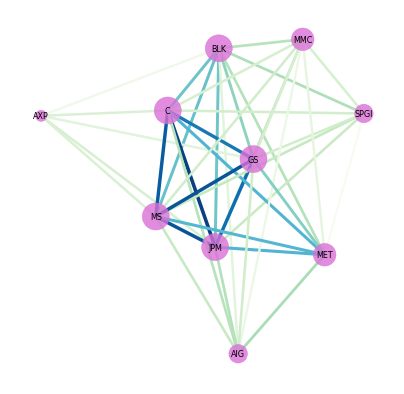

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.5, ax)

fig.savefig('Returns_correlation_graph.png', dpi=200, bbox_inches='tight')

Graphs are a visualisation tools to represent the underlying relationships in a given dataset. We can construct a graph of our 10 selected stocks based on the correlation matrix $\mathbf{A}$, where each element of the matrix $\mathbf{A}_{ij}$ denotes the weight of the edge between the two stocks $i$ and $j$. 

The weight of an edge represents the strength of the connection / relationship between the vertices. Correlation between assets in a quantitative indication of their relationship to each other, hence we use the correlation matrix of our 10 chosen stocks, given in Table \ref{tab:5.2}, and visualise these relationships using the graph in Figure \ref{5.2}. The correlation between two stocks $i$ and $j$ defines the weight of the edge between vertices $i$ and $j$. 

From Figure \ref{5.2}, we observe that the strengh of an edge is represented both by its thickness and the darkness of its colour. The importance of a vertex is represented by its size and the vertices are naturally positioned in such a way that the strongly connected vertices are closer to each other. We have removed the edges where the weights were less than 0.5 and the edges of a stock to itself (correlation of 1). 

## 5.3. Graph Analysis

We can observe from Figure \ref{5.2} that the nodes are positioned in such a way that the ones with strong connections are closer to each other, and the ones that have a weaker connection are further appart. For example, we can see that Gs, Ms, C and JPM which are highly correlated between each other are all pakced in the same area of the graph. On the other hand, AXP, which exhibits the lowest correlation to the other stocks is postioned further appart, on its own. This positionning indicates that companies within the same GICS sub industry (JPM and C or GS and MS) exhibit a higher correlation than the companies in other sub categories (such as AXP). 

The positioning of the nodes is done using the Fruchterman-Reingold force-directed algorithm, which simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, and the simulation continues until the positions are close to an equilibrium. Furthermore, the edges are styled in such a way that the ones with larger weights are darker and thicker, while the others are lighter and thinner.

The degree of a node is defined by the number of edges it has and represents the importance of a node within the graph. The graph in Figure \ref{5.2} illustrates this importance by changing the size of the nodes, meaning the nodes with higher degrees are larger than the others. For example, banks with diversified operations such as JP Morgan Chase (JPM) or Citigroup (C) hold central positions with larger nodes reflecting the diversified nature of their business. Since they operate in a variety of sectors, such as asset management, brokerage, retail and investment banking, they have high correaltions with most of the companies in the financial sector. On the other hand, a company like Amercian Express (AXP), which main business is centered around debit and credit cards and does deal with retail and investment banking activities, they exhibit lower correlation with the other companies and therefore are placed further away in a smaller node. 

Finally, we note that the re-ordering of the graph vertices or the re-ordering of the timer-series wouldn’t affect the structure of the graph. As previously mentioned, a graph is defined by its adjacency matrix, where each column or row represents a certain vertex, and each element in the adjacency matrix represents the weight of the edge between vertices. Therefore, the re-ordering of the vertices would change the position of the elements in this matrix but not their values and would not affect the resulting graph. Furthermore, because the re-ordering of the time series data wouldn’t have changed the corresponding correlation matrix, this wouldn’t affect the resulting graph either. 
To prove this point in practice, we re-order the graph vertices and the times-series data and generate the graph given in Figure \ref{5.3}, which exhibits a similar topology with exact same connections.




In [ ]:
shuffled_returns = returns.sample(frac=1, axis=0).sample(frac=1, axis=1)
corr_matrix = shuffled_returns.corr()
corr_matrix

,GS,SPGI,MS,AXP,MET,C,MMC,AIG,JPM,BLK
GS,1.000000,0.594903,0.865439,0.559470,0.698780,0.824291,0.581445,0.597581,0.836598,0.688928
SPGI,0.594903,1.000000,0.617912,0.462673,0.504903,0.592265,0.586513,0.459869,0.610638,0.649981
MS,0.865439,0.617912,1.000000,0.577062,0.746946,0.856974,0.596269,0.617307,0.865723,0.729031
AXP,0.559470,0.462673,0.577062,1.000000,0.495523,0.574842,0.469991,0.435220,0.583079,0.523309
MET,0.698780,0.504903,0.746946,0.495523,1.000000,0.750710,0.546175,0.659178,0.751688,0.643319
C,0.824291,0.592265,0.856974,0.574842,0.750710,1.000000,0.587256,0.637896,0.887535,0.723413
MMC,0.581445,0.586513,0.596269,0.469991,0.546175,0.587256,1.000000,0.531102,0.626700,0.637921
AIG,0.597581,0.459869,0.617307,0.435220,0.659178,0.637896,0.531102,1.000000,0.644480,0.556012
JPM,0.836598,0.610638,0.865723,0.583079,0.751688,0.887535,0.626700,0.644480,1.000000,0.719505
BLK,0.688928,0.649981,0.729031,0.523309,0.643319,0.723413,0.637921,0.556012,0.719505,1.000000


In [ ]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)


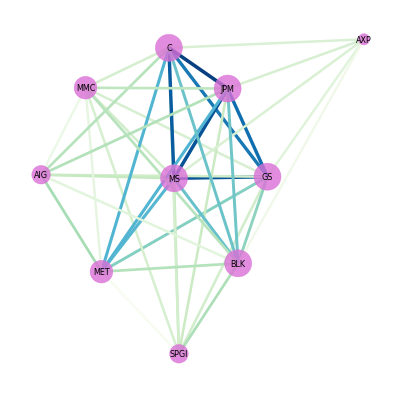

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.5, ax)

fig.savefig('Returns_correlation_graph_reordered.png', dpi=200, bbox_inches='tight')

## 5.4. Spectral Similarity Graph

In the previous sections, we constructed  the graphs using the correlations between the return of the assets. In this section, we will follow a similar process, but this time using the spectral similarity of the return series of the chosen assets in order to construct the graph. We plot the spectra of each asset in Figure \ref{bar:5.4} and the graph defined by the correlation matrix of the spectras is given in Figure \ref{graph:5.4}. Note that the edges are only drawn for pair with correlation higher greater 0.25, and self-correlations are also omitted. 

The motivation for using this measure is the fact that companies undergo certain business and economic cycles which can affect their returns. It is possible to visualize the similarity of the firms in this sense, that is which firms are affected by similar economic cycles, with a graph.

Firstly, we can observe the position and weakness of the links of American Express (AXP) which highlights the previous observations about the nature of their business discussed in the previous section. More interestingly, this graph highlights the relationships between different business cycles. For instance, we observe JPM, C, GS, MS meaning they are all affected by the similar business cycles. The same thing can be observed with AIG and MET, both insurance companies and hence affected by their own particular business cycles. 

In [ ]:
freqs = np.fft.fftfreq(len(returns.index), d=1)
PSs = pd.DataFrame(index=freqs, columns=returns.columns)

for stock in returns.columns:
    PSs[stock] = abs(np.fft.fft(returns[stock]))**2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


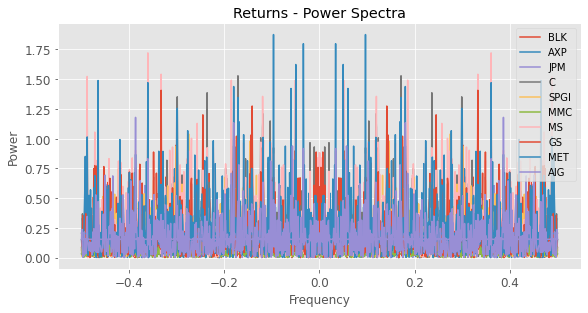

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)


PSs.plot(ax=ax, fontsize=12)
ax.set_title('Returns - Power Spectra')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power')


fig.savefig('Returns_Power_Spectra.eps', dpi=200, bbox_inches='tight')

In [ ]:
corr_matrix = PSs.corr()
corr_matrix

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.147365,0.466777,0.490946,0.401535,0.412731,0.511524,0.471258,0.331406,0.258357
AXP,0.147365,1.000000,0.309494,0.277420,0.125683,0.146337,0.263841,0.271138,0.186115,0.195091
JPM,0.466777,0.309494,1.000000,0.814169,0.356665,0.403926,0.717684,0.701042,0.509668,0.418272
C,0.490946,0.277420,0.814169,1.000000,0.324404,0.358711,0.727035,0.666742,0.551179,0.426483
SPGI,0.401535,0.125683,0.356665,0.324404,1.000000,0.349122,0.353108,0.269215,0.214902,0.199512
MMC,0.412731,0.146337,0.403926,0.358711,0.349122,1.000000,0.339972,0.296282,0.267499,0.291693
MS,0.511524,0.263841,0.717684,0.727035,0.353108,0.339972,1.000000,0.749223,0.516756,0.384318
GS,0.471258,0.271138,0.701042,0.666742,0.269215,0.296282,0.749223,1.000000,0.436883,0.345499
MET,0.331406,0.186115,0.509668,0.551179,0.214902,0.267499,0.516756,0.436883,1.000000,0.489152
AIG,0.258357,0.195091,0.418272,0.426483,0.199512,0.291693,0.384318,0.345499,0.489152,1.000000


In [ ]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

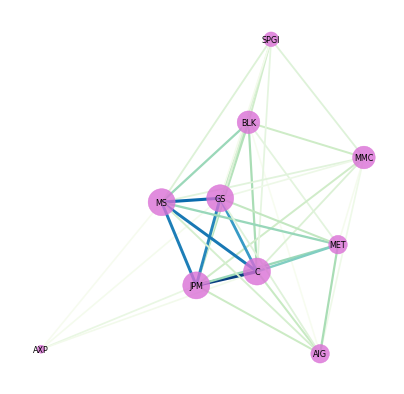

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.25, ax)

fig.savefig('Returns_Power_Spectra_Graph.png', dpi=200, bbox_inches='tight')

In the previous section, we mentioned that the re-ordering of the time-series doesn’t have an affect on the construction of the graph. This is not the case for the spectral graph constructed in this section because when the time-series is re-ordered, its spectra changes as it can be seen in Figure \ref{bar:5.4.1}. Then, the values in the correlation matrix calculated for these spectra also changes, which as a result affects the weights of the graph to be constructed. We have the graph for the re-ordered series in Figure \ref{graph:5.4.1}, which is similar to the graph we previously had, but it does have some discrepancies. Note that the re-ordering of the vertices still won’t have any affects on the graph properties.


In [ ]:
#shuffled returns

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


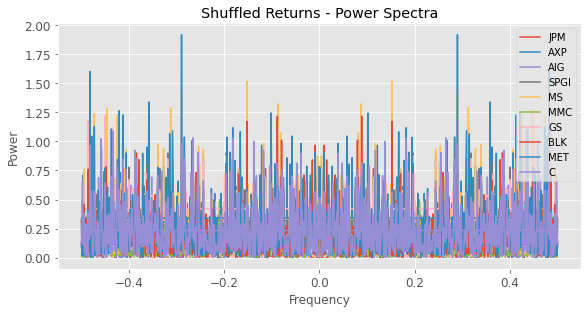

In [ ]:
shuffled_returns = returns.sample(frac=1, axis=0).sample(frac=1, axis=1)

freqs = np.fft.fftfreq(len(shuffled_returns.index), d=1)
PSs = pd.DataFrame(index=freqs, columns=shuffled_returns.columns)

for stock in shuffled_returns.columns:
    PSs[stock] = abs(np.fft.fft(shuffled_returns[stock]))**2

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)


PSs.plot(ax=ax, fontsize=12)
ax.set_title('Shuffled Returns - Power Spectra')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power')


fig.savefig('Returns_Power_Spectra_Reordered.eps', dpi=200, bbox_inches='tight')

In [ ]:
corr_matrix = PSs.corr()
corr_matrix

,JPM,AXP,AIG,SPGI,MS,MMC,GS,BLK,MET,C
JPM,1.000000,0.322319,0.475625,0.372373,0.724549,0.413048,0.675767,0.504992,0.589775,0.742222
AXP,0.322319,1.000000,0.116689,0.204982,0.286700,0.198645,0.310549,0.280267,0.201136,0.313202
AIG,0.475625,0.116689,1.000000,0.204742,0.371245,0.275836,0.320572,0.307847,0.419765,0.386951
SPGI,0.372373,0.204982,0.204742,1.000000,0.381251,0.357710,0.390633,0.404886,0.228786,0.333052
MS,0.724549,0.286700,0.371245,0.381251,1.000000,0.361832,0.733125,0.540775,0.586247,0.683225
MMC,0.413048,0.198645,0.275836,0.357710,0.361832,1.000000,0.298116,0.338700,0.323941,0.326251
GS,0.675767,0.310549,0.320572,0.390633,0.733125,0.298116,1.000000,0.471475,0.516935,0.659268
BLK,0.504992,0.280267,0.307847,0.404886,0.540775,0.338700,0.471475,1.000000,0.410922,0.516091
MET,0.589775,0.201136,0.419765,0.228786,0.586247,0.323941,0.516935,0.410922,1.000000,0.549321
C,0.742222,0.313202,0.386951,0.333052,0.683225,0.326251,0.659268,0.516091,0.549321,1.000000


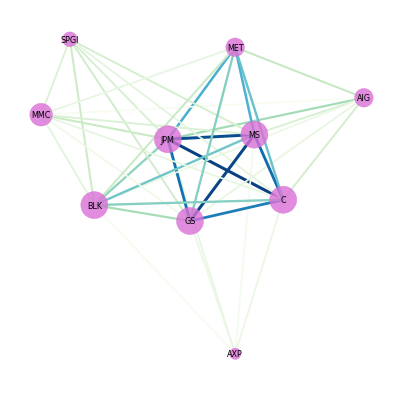

In [ ]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.25, ax)

fig.savefig('Returns_Power_Spectra_Graph_Reordered.png', dpi=200, bbox_inches='tight')

## 5.5. Using Prices vs. Returns for Graph Construction

In Figure \ref{5.5}, we constructed a graph using the correlation matrix of prices. Compared to the previous graphs in section 5.2, which were generated using the correlation matrix of returns, this graph does not convey much information about the intrinsic relationships of the considered companies. We only get little information about the general trends of the signals and don't learn much about the relationships and connections of firms between each other. In this case, we have only kept the edges with positive weights.

In [ ]:
returns.corr()

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.523309,0.719505,0.723413,0.649981,0.637921,0.729031,0.688928,0.643319,0.556012
AXP,0.523309,1.000000,0.583079,0.574842,0.462673,0.469991,0.577062,0.559470,0.495523,0.435220
JPM,0.719505,0.583079,1.000000,0.887535,0.610638,0.626700,0.865723,0.836598,0.751688,0.644480
C,0.723413,0.574842,0.887535,1.000000,0.592265,0.587256,0.856974,0.824291,0.750710,0.637896
SPGI,0.649981,0.462673,0.610638,0.592265,1.000000,0.586513,0.617912,0.594903,0.504903,0.459869
MMC,0.637921,0.469991,0.626700,0.587256,0.586513,1.000000,0.596269,0.581445,0.546175,0.531102
MS,0.729031,0.577062,0.865723,0.856974,0.617912,0.596269,1.000000,0.865439,0.746946,0.617307
GS,0.688928,0.559470,0.836598,0.824291,0.594903,0.581445,0.865439,1.000000,0.698780,0.597581
MET,0.643319,0.495523,0.751688,0.750710,0.504903,0.546175,0.746946,0.698780,1.000000,0.659178
AIG,0.556012,0.435220,0.644480,0.637896,0.459869,0.531102,0.617307,0.597581,0.659178,1.000000


In [ ]:
corr_matrix = logpx.corr()
corr_matrix

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.783670,0.892168,0.859566,0.910314,0.858636,0.852563,0.776993,0.546137,-0.024006
AXP,0.783670,1.000000,0.838891,0.883232,0.808664,0.713383,0.881191,0.769254,0.640400,-0.234708
JPM,0.892168,0.838891,1.000000,0.904992,0.950498,0.932230,0.893102,0.823562,0.552220,-0.092348
C,0.859566,0.883232,0.904992,1.000000,0.823201,0.782713,0.968934,0.934010,0.802213,0.151227
SPGI,0.910314,0.808664,0.950498,0.823201,1.000000,0.948569,0.810000,0.688886,0.404611,-0.215980
MMC,0.858636,0.713383,0.932230,0.782713,0.948569,1.000000,0.762701,0.668929,0.398421,-0.142358
MS,0.852563,0.881191,0.893102,0.968934,0.810000,0.762701,1.000000,0.958328,0.802494,0.132962
GS,0.776993,0.769254,0.823562,0.934010,0.688886,0.668929,0.958328,1.000000,0.851570,0.320938
MET,0.546137,0.640400,0.552220,0.802213,0.404611,0.398421,0.802494,0.851570,1.000000,0.478403
AIG,-0.024006,-0.234708,-0.092348,0.151227,-0.215980,-0.142358,0.132962,0.320938,0.478403,1.000000


In [ ]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

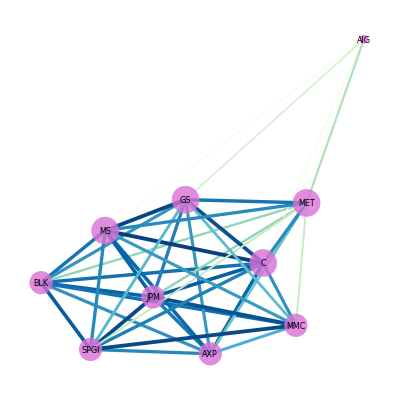

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0, ax)

fig.savefig('Prices_Correlation_Graph.png', dpi=200, bbox_inches='tight')

In Figure \ref{log5.5}, we have normalised the log-price signals.  Observe that while most of the signals are upward trending, the price of AIG is downward trending and therefore has negative correlation with most of the other firms. This is visualized by the position of the AIG vertex in Figure \ref{5.5} and the number of edges connected to it.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


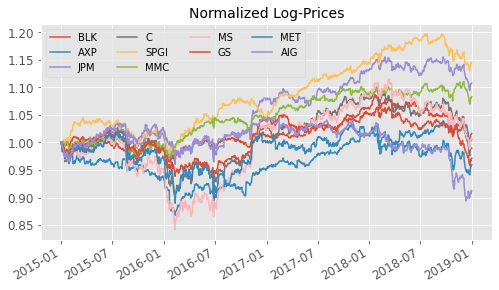

In [ ]:
# general plotting convention
fig, ax = plt.subplots(1,1, figsize=(7,4))
fig.tight_layout()

(logpx/logpx.iloc[0]).plot(ax=ax, fontsize=12); 
ax.set_title("Normalized Log-Prices", fontsize=14)
ax.set_xlabel('')
ax.legend(loc='upper left', ncol=4)

fig.savefig('Normalised_log_prices.eps', dpi=200, bbox_inches='tight')


Finally, because the price series have constant values in them, as they are not zero-mean signals, their spectra will be very high at low frequency values for all signals, making the entire analysis using spectra irrelevant. Therefore, we conclude that it would be more appropriate to use returns to conduct such analysis.